#### Imports

In [201]:
import numpy as np
import pandas as pd
import calendar

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

pd.options.display.float_format = '{:.2f}'.format

#### Read the csv imported file

In [54]:
df = pd.read_csv('pl.csv')

#### Show the first 3 lines

In [55]:
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2017,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,3,9,10,14,7,4,3,2,0,0
1,2017,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,4,3,12,15,3,6,2,2,0,0
2,2017,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,6,4,10,14,5,6,0,0,0,0


#### Convert to Date Format

In [57]:
#df['Date'] = pd.to_datetime(df.Date)
#df.sort_values('Date').head(3)
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by = 'Date').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
3837,2008,2007-01-09,Bolton,Everton,1,2,A,0,1,A,...,7,11,8,10,11,6,1,3,0,0
3839,2008,2007-01-09,Liverpool,Derby,6,0,H,2,0,H,...,10,3,10,14,4,2,0,1,0,0
3840,2008,2007-01-09,Man United,Sunderland,1,0,H,0,0,D,...,9,1,10,7,6,0,1,2,0,0


#### Check Null Data

In [59]:
#df.isnull().values.any()
#df.isnull().sum().sum()
df.isnull().sum().head(3)

Season      0
Date        0
HomeTeam    0
dtype: int64

#### DataSet Info

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 23 columns):
Season      4180 non-null int64
Date        4180 non-null datetime64[ns]
HomeTeam    4180 non-null object
AwayTeam    4180 non-null object
FTHG        4180 non-null int64
FTAG        4180 non-null int64
FTR         4180 non-null object
HTHG        4180 non-null int64
HTAG        4180 non-null int64
HTR         4180 non-null object
Referee     4180 non-null object
HS          4180 non-null int64
AS          4180 non-null int64
HST         4180 non-null int64
AST         4180 non-null int64
HF          4180 non-null int64
AF          4180 non-null int64
HC          4180 non-null int64
AC          4180 non-null int64
HY          4180 non-null int64
AY          4180 non-null int64
HR          4180 non-null int64
AR          4180 non-null int64
dtypes: datetime64[ns](1), int64(17), object(5)
memory usage: 751.2+ KB


#### All football teams that have played at least one season on Premier League

In [65]:
df['HomeTeam'].unique()

array(['Burnley', 'Crystal Palace', 'Everton', 'Hull', 'Man City',
       'Middlesbrough', 'Southampton', 'Arsenal', 'Bournemouth', 'Chelsea',
       'Man United', 'Leicester', 'Stoke', 'Swansea', 'Tottenham',
       'Watford', 'West Brom', 'Sunderland', 'West Ham', 'Liverpool',
       'Norwich', 'Newcastle', 'Aston Villa', 'QPR', 'Fulham', 'Cardiff',
       'Reading', 'Wigan', 'Blackburn', 'Bolton', 'Wolves', 'Brighton',
       'Huddersfield', 'Birmingham', 'Blackpool', 'Portsmouth', 'Derby'], dtype=object)

#### Actual number of the above teams. We see that there are 37 clubs that have participated on Premier League the last 10 years

In [67]:
df['HomeTeam'].nunique()

37

#### Adding a new column for totalGoal count of every match

In [104]:
df['tGoals'] = df['FTHG'] + df['FTAG']

##### Create new Column for month extracted from Date. Same for the Day.

In [85]:
#time = df['Date'].iloc[0]
#time.month
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day'] = df['Date'].apply(lambda time: time.dayofweek)

#### Assign 'Jan', 'Feb' etc... for each one

In [86]:
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(dmap)

##### Same for Days

In [87]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(dmap)

#### Show me all the columns

In [88]:
print(df.columns)

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'Month', 'Day'],
      dtype='object')


#### Index Info

In [71]:
print(df.index)

RangeIndex(start=0, stop=4180, step=1)


#### Show the first 3 lines of the dataframe. Just making sure that all added stuff shows up.

In [84]:
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2017,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,3,9,10,14,7,4,3,2,0,0
1,2017,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,4,3,12,15,3,6,2,2,0,0
2,2017,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,6,4,10,14,5,6,0,0,0,0


#### Show the last 3 lines of the dataframe. Let's see what's going down there too. :P

In [74]:
df.tail(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4177,2008,2008-11-05,Tottenham,Liverpool,0,2,A,0,0,D,...,3,12,11,9,8,4,1,1,0,0
4178,2008,2008-11-05,West Ham,Aston Villa,2,2,D,1,1,D,...,8,8,9,21,7,8,2,2,0,0
4179,2008,2008-11-05,Wigan,Man United,0,2,A,0,1,A,...,6,6,10,5,5,12,3,2,0,0


#### Knowing there is a column Season we can see which Premier League seasons are included in this dataset.

In [76]:
df['Season'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2018, 2011, 2010, 2009, 2008])

#### Total seasons included on DataSet.

In [78]:
df['Season'].nunique()

11

#### View total number of premier league matches each season.

We expect this number to be always the same, as long as the number of the teams that participate doesnt change.

In [91]:
df['Season'].value_counts().sort_index()

2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
Name: Season, dtype: int64

#### Total number of matches per month.

We convert it to a DataFrame for possible further usage. We notice that the most premier league matches happen on December.

In [100]:
#df['Month'].value_counts()
perMonth = df['Month'].value_counts().to_frame(name='Matches').reindex(list(calendar.month_abbr)).dropna().astype(int)
perMonth

,Matches
Jan,474
Feb,313
Mar,366
Apr,420
May,261
Jun,100
Jul,104
Aug,397
Sep,406
Oct,409


#### Total number of matches per day. Saturday is the day with most matches.

In [177]:
perDay = df['Day'].value_counts().to_frame(name='Matches').reindex(list(calendar.day_abbr))
perDay

,Matches
Mon,304
Tue,337
Wed,436
Thu,274
Fri,235
Sat,1753
Sun,841


#### Total number of goals per season

In [105]:
#df.groupby('Season').sum().reset_index()
#df2 = df.groupby('Season').sum().reset_index()
#df2.sort_values('totalGoals', ascending=False)
totalGoals = df.groupby(['Season'])[["tGoals"]].sum().reset_index()
totalGoals

,Season,tGoals
0,2008,1002
1,2009,942
2,2010,1053
3,2011,1063
4,2012,1066
5,2013,1063
6,2014,1052
7,2015,975
8,2016,1026
9,2017,1064


#### Average number of goals per season

In [113]:
# ΠΕΡΙΛΑΜΒΑΝΕΤΑΙ ΤΑΞΙΝΟΜΗΣΗ ΤΟΥ ΑΠΟΤΕΛΕΣΜΑΤΟΣ. ΣΤΗΝ ΚΟΡΥΦΗ ΒΡΙΣΚΕΤΑΙ Η ΣΑΙΖΟΝ ΠΟΥ ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ.
# ΣΤΗ ΣΥΓΚΕΚΡΙΜΕΝΗ ΠΕΡΙΠΤΩΣΗ Η ΣΑΙΖΟΝ 2011-12 ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ ΜΕ 2,81 ΓΚΟΛ ΑΝΑ ΑΓΩΝΑ
#df3.sort_values('totalGoals', ascending=False)
avgGoals = df.groupby(['Season'])[["tGoals","HS","AS"]].mean().reset_index()
avgGoals

,Season,tGoals,HS,AS
0,2008,2.64,12.85,10.27
1,2009,2.48,13.65,10.71
2,2010,2.77,13.73,10.72
3,2011,2.80,13.80,11.06
4,2012,2.81,14.53,11.43
5,2013,2.80,14.12,11.01
6,2014,2.77,14.96,11.92
7,2015,2.57,14.62,11.29
8,2016,2.70,14.31,11.37
9,2017,2.80,14.01,11.48


#### Total number of goals, all seasons included. 

In [115]:
df['tGoals'].sum()

11324

#### Average number of goals, all seasons included.

In [116]:
df['tGoals'].mean()

2.709090909090909

#### Show me all the matches that HomeTeam has scored more than 6 goals.

In [122]:
df.query('FTHG >= 6').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Month,Day,tGoals
71,2017,2016-10-15,Bournemouth,Hull,6,1,H,3,1,H,...,14,5,4,0,3,0,0,Oct,Sat,7
108,2017,2016-06-11,Liverpool,Watford,6,1,H,3,0,H,...,10,6,3,1,2,0,0,Jun,Sat,7
232,2017,2017-04-02,Everton,Bournemouth,6,3,H,3,0,H,...,4,4,8,3,1,0,0,Apr,Sun,9


#### Show me all the matches that AwayTeam has scored more than 6 goals.

In [123]:
df.query('FTAG >= 6').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Month,Day,tGoals
369,2017,2017-05-18,Leicester,Tottenham,1,6,A,0,2,A,...,8,4,4,3,1,0,0,May,Thu,7
373,2017,2017-05-21,Hull,Tottenham,1,7,A,0,3,A,...,5,2,3,0,0,0,0,May,Sun,8
638,2016,2016-02-14,Aston Villa,Liverpool,0,6,A,0,2,A,...,9,0,6,3,1,0,0,Feb,Sun,6


#### Show me all the matches of a specific HomeTeam. Create a home_team function for general use.

In [129]:
home_team = lambda x: df.loc[(df['HomeTeam'] == x)]

df.loc[(df['HomeTeam'] == 'Liverpool' )].head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Month,Day,tGoals
33,2017,2016-10-09,Liverpool,Leicester,4,1,H,2,1,H,...,8,1,7,1,2,0,0,Oct,Sun,5
52,2017,2016-09-24,Liverpool,Hull,5,1,H,3,0,H,...,8,13,2,1,2,0,1,Sep,Sat,6
79,2017,2016-10-17,Liverpool,Man United,0,0,D,0,0,D,...,20,3,1,0,4,0,0,Oct,Mon,0


#### Same way, show me all the Away matches of a specific team. Create an away_team function too.

In [132]:
away_team = lambda x: df.loc[(df['AwayTeam'] == x)]

df.loc[(df['AwayTeam'] == 'Leicester')].head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Month,Day,tGoals
3,2017,2016-08-13,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,Aug,Sat,3
33,2017,2016-10-09,Liverpool,Leicester,4,1,H,2,1,H,...,8,1,7,1,2,0,0,Oct,Sun,5
53,2017,2016-09-24,Man United,Leicester,4,1,H,4,0,H,...,12,8,6,0,2,0,0,Sep,Sat,5


#### Show me all the matches of a specifi team on a specific season

In [137]:
#df.query('HomeTeam == "Liverpool" | AwayTeam == "Liverpool" ')
df.loc[((df['HomeTeam'] == 'Liverpool') | (df['AwayTeam'] == 'Liverpool')) & (df['Season'] == 2016 ) ].head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Month,Day,tGoals
388,2016,2015-09-08,Stoke,Liverpool,0,1,A,0,0,D,...,16,3,5,2,4,0,0,Sep,Tue,1
399,2016,2015-08-17,Liverpool,Bournemouth,1,0,H,1,0,H,...,18,6,8,1,4,0,0,Aug,Mon,1
409,2016,2015-08-24,Arsenal,Liverpool,0,0,D,0,0,D,...,13,7,8,1,4,0,0,Aug,Mon,0
413,2016,2015-08-29,Liverpool,West Ham,0,3,A,0,2,A,...,11,5,7,3,1,1,1,Aug,Sat,3


#### Show me the matches that happened on a specific date. Create a specific_date function too.

In [140]:
specific_date = lambda x: df.loc[(df['Date'] == x )]

df.loc[(df['Date'] == '24/09/16' )].head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Month,Day,tGoals
50,2017,2016-09-24,Arsenal,Chelsea,3,0,H,3,0,H,...,11,9,1,0,2,0,0,Sep,Sat,3
51,2017,2016-09-24,Bournemouth,Everton,1,0,H,1,0,H,...,14,5,3,2,2,0,0,Sep,Sat,1
52,2017,2016-09-24,Liverpool,Hull,5,1,H,3,0,H,...,8,13,2,1,2,0,1,Sep,Sat,6


#### Show me the matches between 2 specific teams. Create a home_away function too.

In [145]:
#df.loc[(df['HomeTeam'] == 'Liverpool' & ['AwayTeam'] == 'Leicester')]
df.query('HomeTeam == "Liverpool" & AwayTeam == "Chelsea" ').head(3)

home_away = lambda x,y: df.loc[(df['HomeTeam'] == x) & (df['AwayTeam'] == y)]

#### Total number of mathes eatch referee had. Save to dataframe for further usage

In [171]:
totalReferees = df['Referee'].value_counts().to_frame(name='Matches').head(5)
totalReferees

,Matches
M Dean,321
M Atkinson,301
A Marriner,267
M Clattenburg,233
L Mason,226


#### Total number of final results for each match on premier league.

We notice that in total of 4180 games, 1926 has ended with HomeTeam winning, 1188 with AwayTeam winning and 1066 mathces were Draw.

In [175]:
print(df.groupby(['FTR']).size())

FTR
A    1188
D    1066
H    1926
dtype: int64


#### Mean number of goals per Full Time Result.

We notice that  mean goals per Home or Away win are almost the same. But for draw are much lower. That can be explained because many draw matches end up with no score at all

In [174]:
print (df[['FTR', 'tGoals']].groupby(['FTR'], 
                as_index=False).mean().sort_values(by='tGoals', ascending=False))

  FTR  tGoals
2   H    2.98
0   A    2.90
1   D    2.00


### Data Exploratory Analysis

Let's do some basic Data Exploratory Analysis on our data.

#### Visualizing the total goals per season.

We notice that 2009 and 2015 season had the less goals scored.

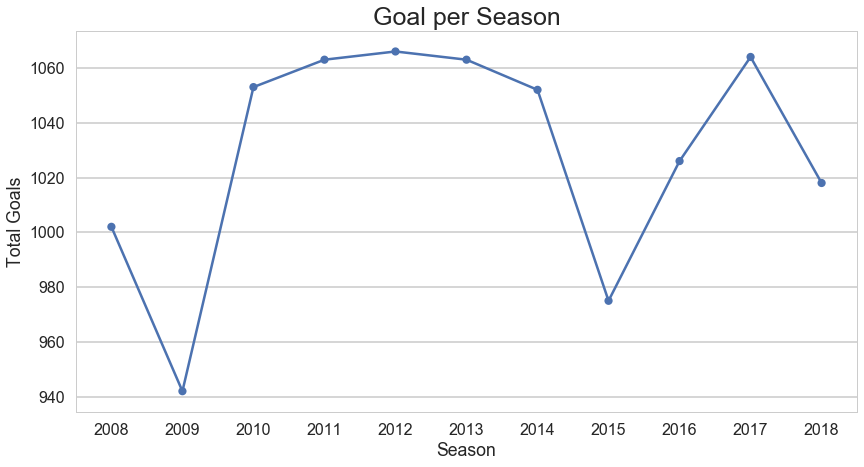

In [208]:
#plt.figure(figsize=(14,9))
#sns.set_context('poster',font_scale=1.2)
#ax = sns.barplot(x='Season', y='tGoals', data=totalGoals, palette="PuBuGn_d")
#ax.axes.set_title("Goals per Season",fontsize=25)
#ax.set_xlabel("Season")
#ax.set_ylabel("Total Goals")

plt.figure(figsize=(14,7))
sns.set_context('poster')
ax = sns.pointplot(x="Season", y = "tGoals", data=totalGoals,scale=0.5)
ax.axes.set_title("Goal per Season",fontsize=25)
ax.set_xlabel("Season")
ax.set_ylabel("Total Goals")

#### Έλεγχος του τελικού νικητή σε συνάρτηση των σουτ της γηπεδούχου ομάδας με την εκτός. Φαίνεται ξεκάθαρα πως όσα περισσότερα σουτ έχει μία ομάδα σε σχέση με την άλλη, είναι περισσότερο πιθανή η νίκη.

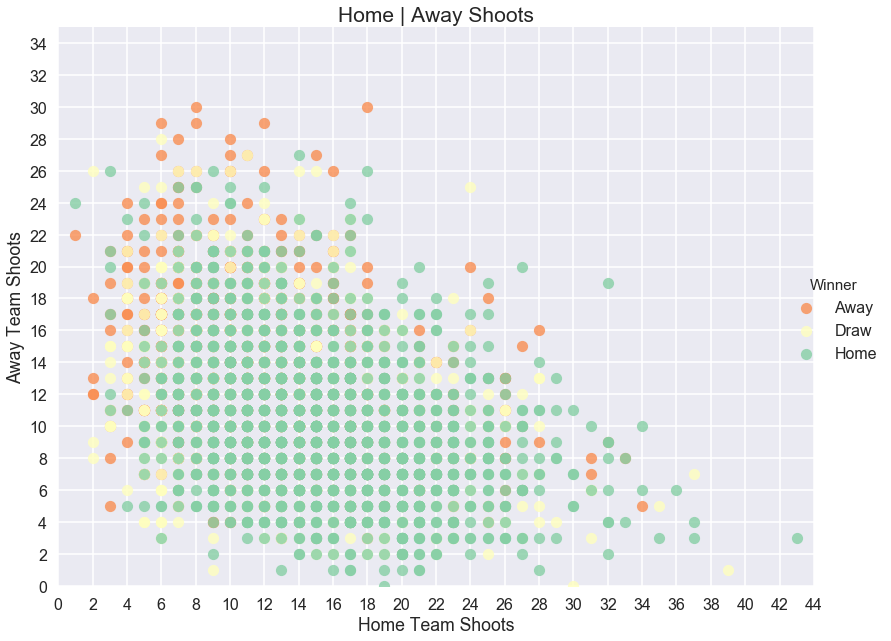

In [43]:
hos = np.arange(0,45,2)
aws = np.arange(0,35,2)
title = 'Winner'
labels = ['Away', 'Draw', 'Home']

sns.set_context('poster')

g = sns.lmplot('HS','AS',data=df, hue='FTR',
           palette='Spectral',size=9,aspect=1.3,fit_reg=False, legend_out = True)
g._legend.set_title(title)
for t, l in zip(g._legend.texts, labels): t.set_text(l)

g = (g.set_axis_labels("Home Team Shoots", "Away Team Shoots")
     .set(xlim=(0, 44), ylim=(0, 35),
          xticks=hos, yticks=aws)
    .fig.subplots_adjust(wspace=0.01))

plt.title("Home | Away Shoots",fontsize=21)

#### Total goals per match

While checking the total goalss per match, we notice that the most possible events are 2 or 3 goals per match. We can also notice that the possibility of a match ending with no goals is almost the same as the possibility of 5 goals scored. It seems that Premier League is such an exciting league.

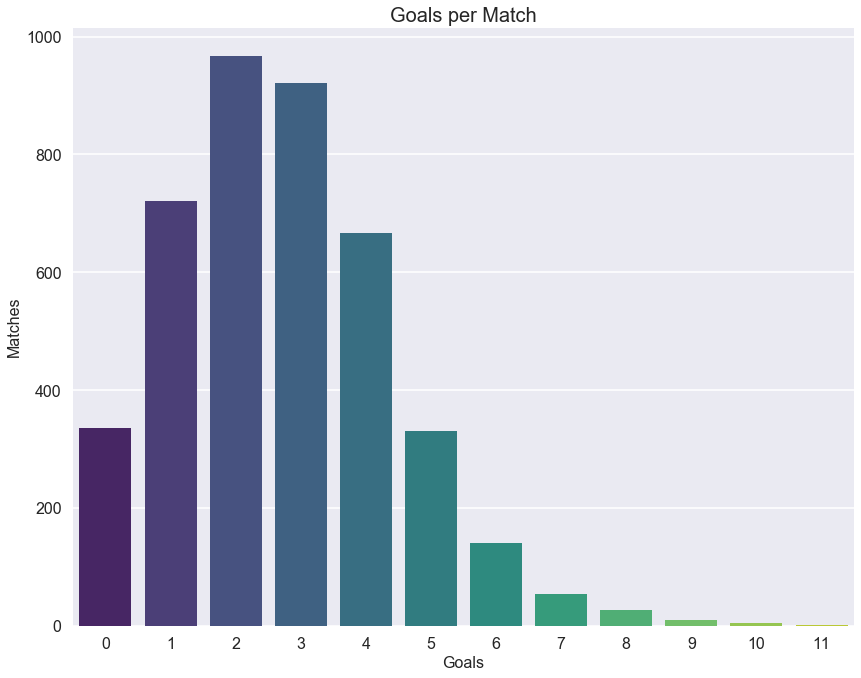

In [169]:
plt.figure(figsize=(14,11))
sns.set_context('poster')
ax = sns.countplot(x='tGoals',data=df,palette='viridis')
ax.axes.set_title("Goals per Match",fontsize=20)
ax.set_xlabel("Goals", fontsize=16)
ax.set_ylabel("Matches", fontsize=16)

### TESTING

In [209]:
dataset = df

In [210]:
dataset.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Month,Day,tGoals
0,2017,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,Aug,Sat,1
1,2017,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,Aug,Sat,1
2,2017,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,Aug,Sat,2
3,2017,2016-08-13,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,Aug,Sat,3
4,2017,2016-08-13,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,Aug,Sat,3


In [49]:
dataset.loc[ dataset['HS'] <= 1, 'HS'] 						        = 0
dataset.loc[(dataset['HS'] > 1) & (dataset['HS'] <= 7), 'HS']      = 1
dataset.loc[(dataset['HS'] > 7) & (dataset['HS'] <= 14), 'HS']      = 2
dataset.loc[(dataset['HS'] > 14) & (dataset['HS'] <= 21), 'HS']      = 3
dataset.loc[(dataset['HS'] > 21) & (dataset['HS'] <= 28), 'HS']      = 4
dataset.loc[(dataset['HS'] > 28) & (dataset['HS'] <= 35), 'HS']      = 5
dataset.loc[(dataset['HS'] > 35) & (dataset['HS'] <= 42), 'HS']      = 6
dataset.loc[ dataset['HS'] > 42, 'HS'] 							    = 7
dataset['HS'] = dataset['HS'].astype(int)

In [50]:
dataset['HS'].head(3)

0    2
1    2
2    2
Name: HS, dtype: int64